Problem Statement A key challenge for property sellers is to determine the sale price of the property. Some are apparent and obvious, and some are not. Nevertheless, a rational approach aided by machine learning can be very useful in predicting the property price. A large data set with 79 different features (like living area, number of rooms, location, etc) along with their prices are provided for residential homes. The challenge is to learn a relationship between the important features and the price. Further, use it to predict the prices of a new set of houses.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()
# os.chdir("C:\Users\HP")
# os.getcwd()

'C:\\Users\\Admin\\Documents\\SLR CASE_STUDY'

In [3]:
import warnings
warnings.filterwarnings('ignore')

df_price = pd.read_csv("houseprice.csv")
df_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_price.shape

(1460, 81)

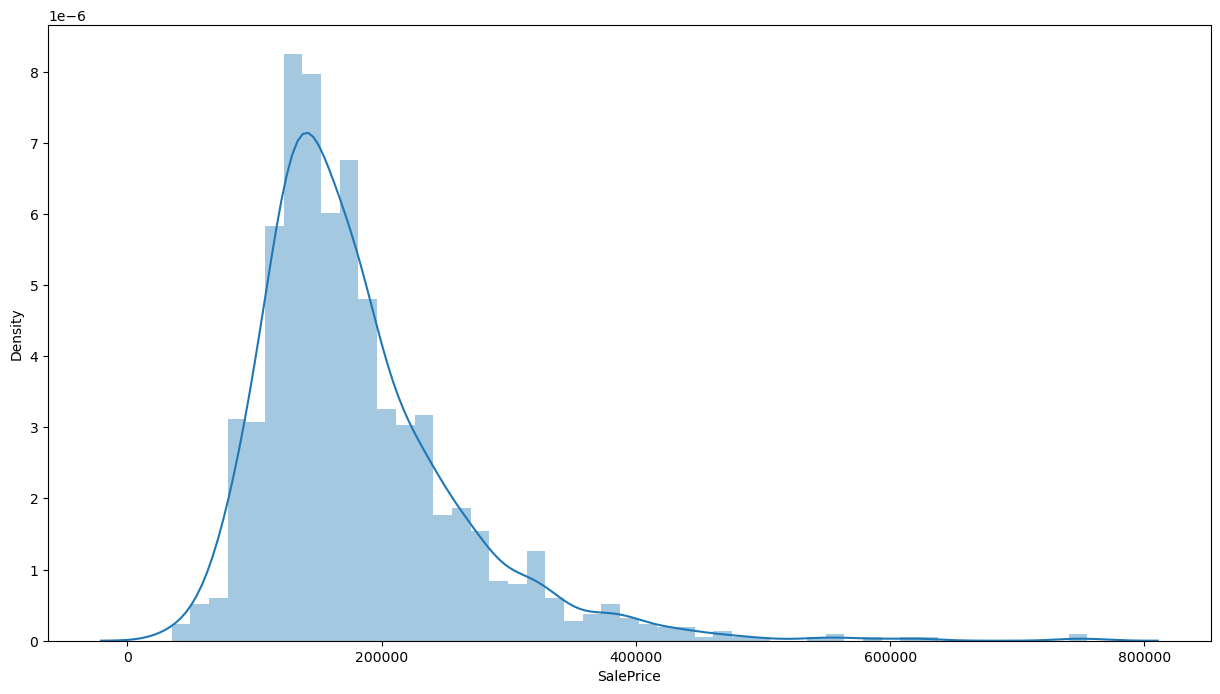

In [5]:
plt.figure(figsize=(15,8))
sns.distplot(df_price['SalePrice'])
plt.show()

In [6]:
df_price['SalePrice'].skew()

1.8828757597682129

In [7]:
df_price.drop('Id',axis=1,inplace=True)

In [8]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
cols=['MSSubClass','OverallQual','OverallCond']

In [10]:
for i in cols:
    df_price[i]=df_price[i].astype('object')

In [11]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [12]:
(df_price.isnull().sum()/len(df_price))*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [13]:
((df_price.isnull().sum()/len(df_price))*100)[(df_price.isnull().sum()/len(df_price))*100 >0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

# Missing values
PoolQC ,MiscFeature ,Alley, Fence , these columns has more that 80% of null value .
now , we will do insted of droping these columns we will prefer to do some feature engineering .

In [14]:
#bifurcate numaric & catagorical columns 
num_cols=df_price.select_dtypes(include=np.number)

In [15]:
num_cols

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [16]:
num_cols=num_cols.drop('SalePrice',axis=1)

In [17]:
num_cols.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [18]:
cat_col=df_price.select_dtypes(exclude=np.number)

In [19]:
cat_col

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Univariate Analysis 


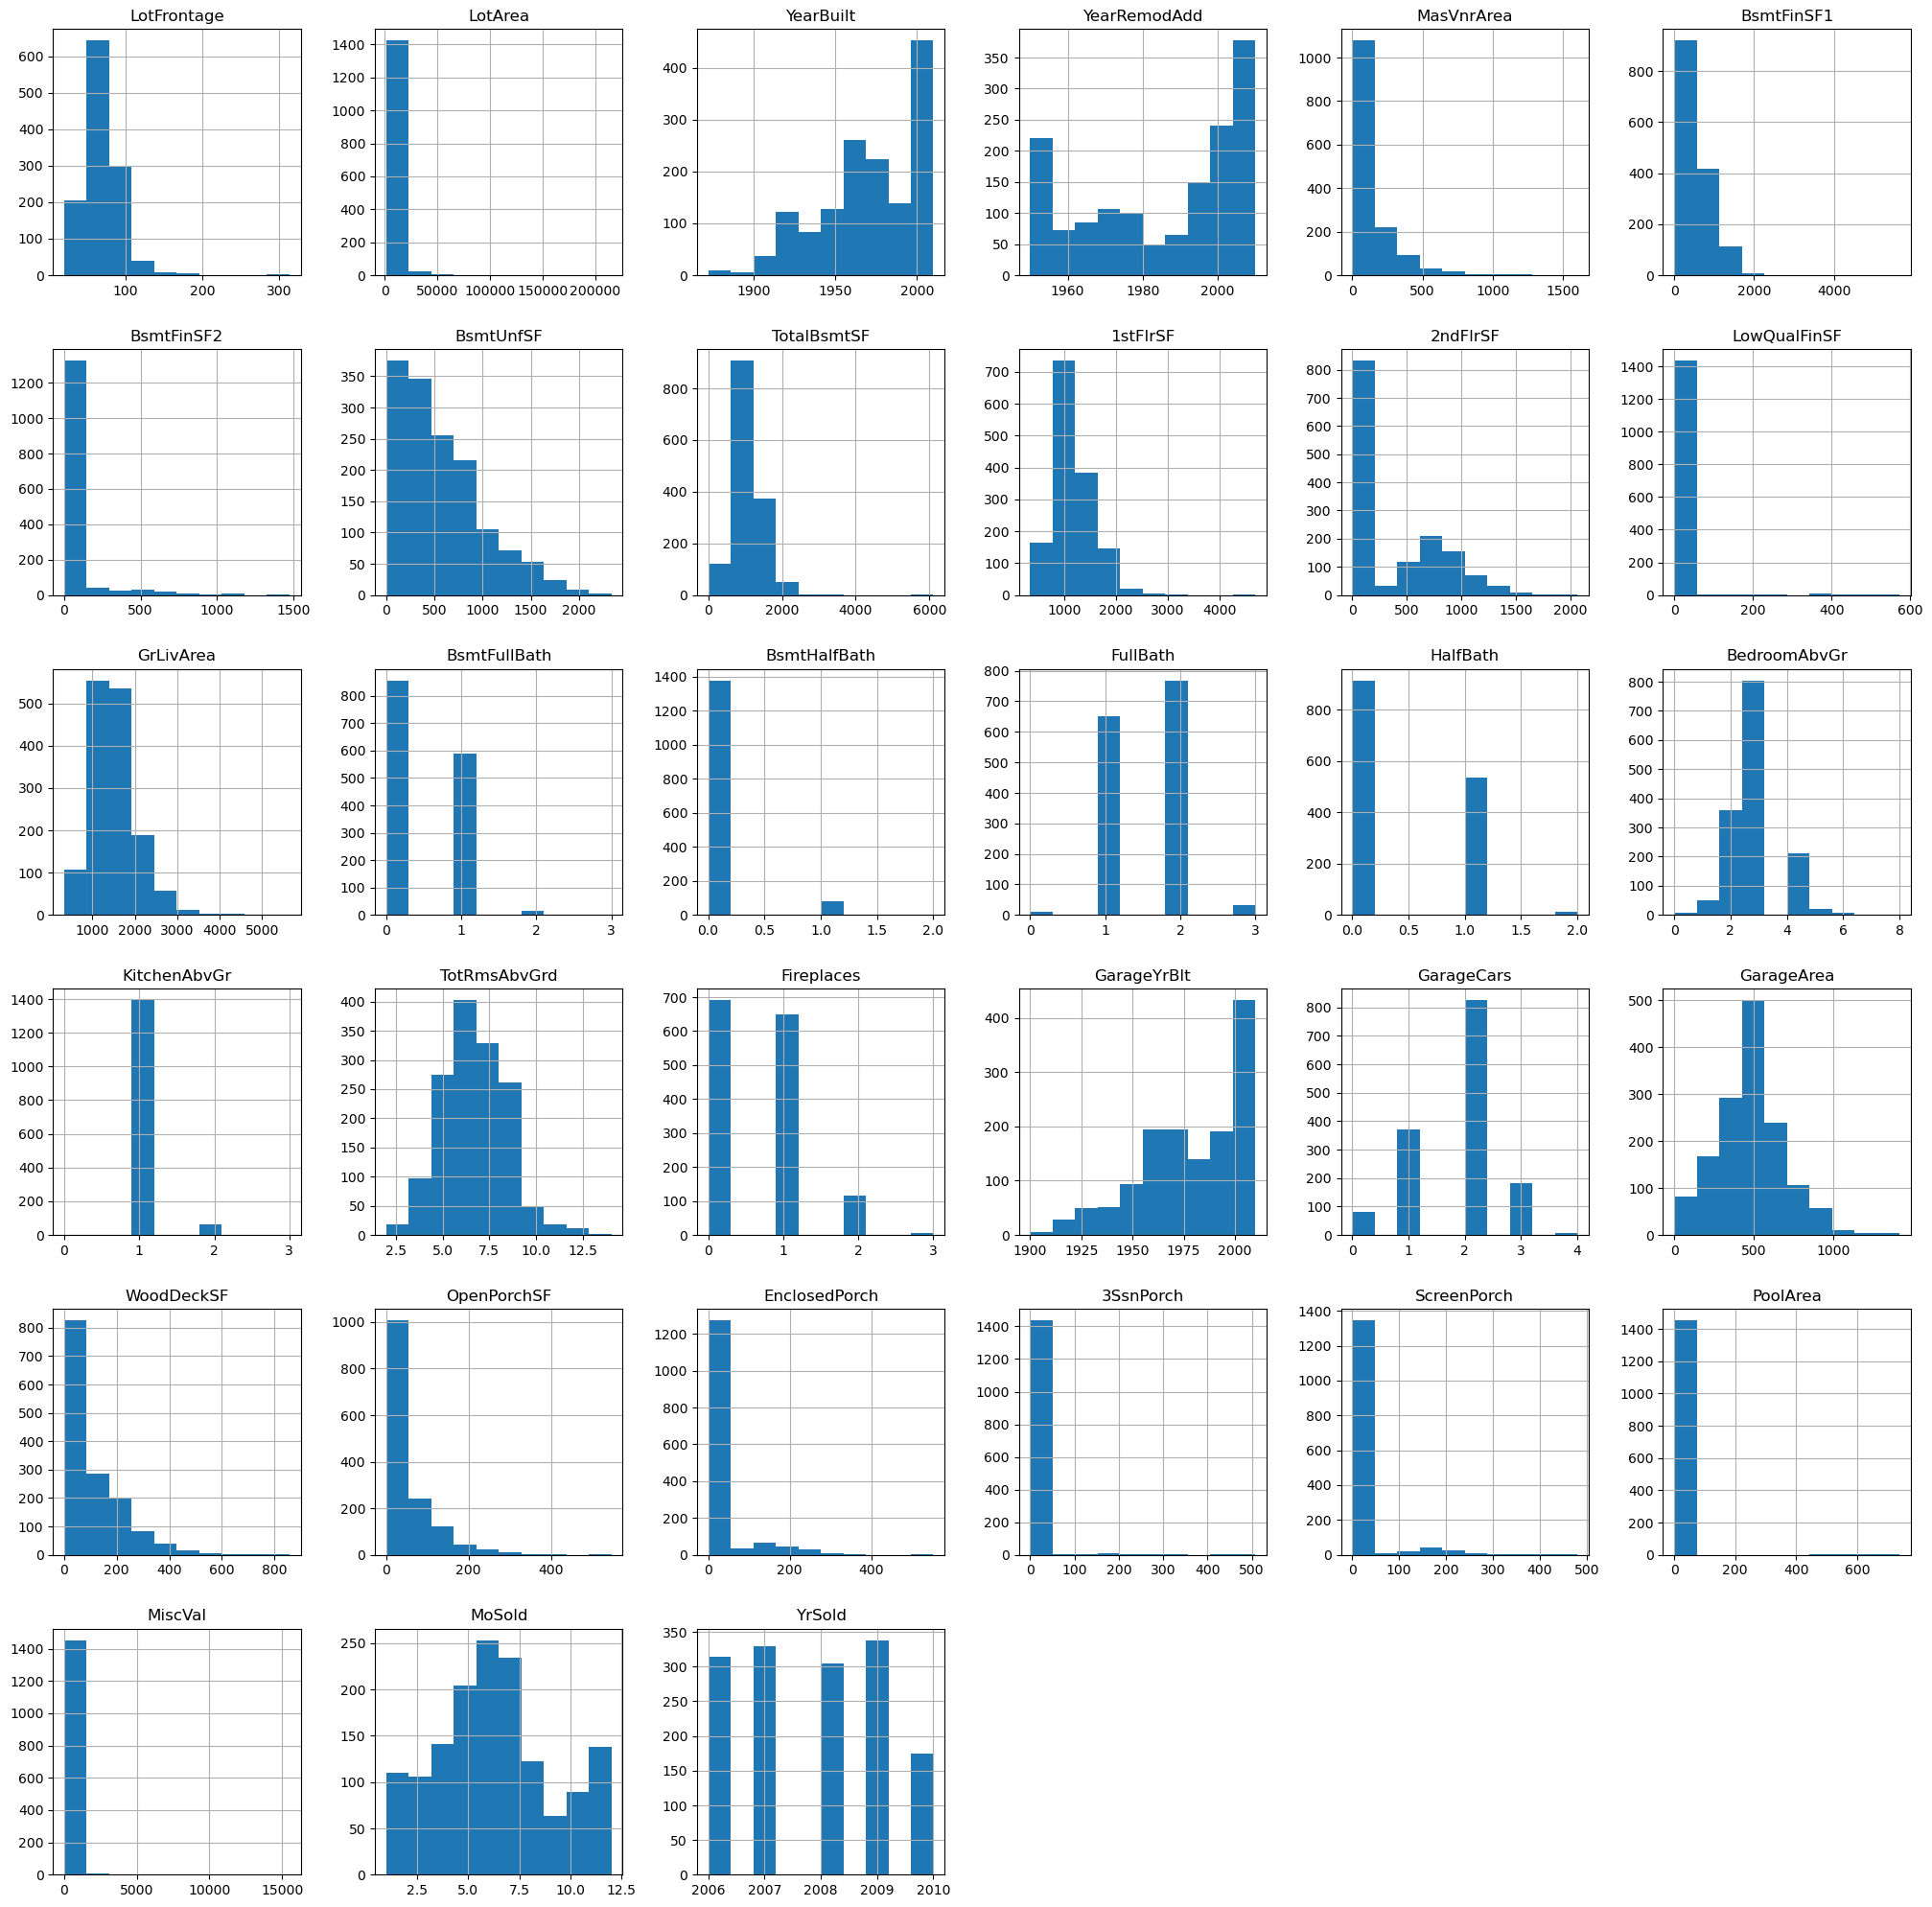

In [20]:
# for numarical column 

# Histograms for each numerical column
histograms = num_cols.hist(bins=10, figsize=(25, 25))

# Show plots
plt.show()

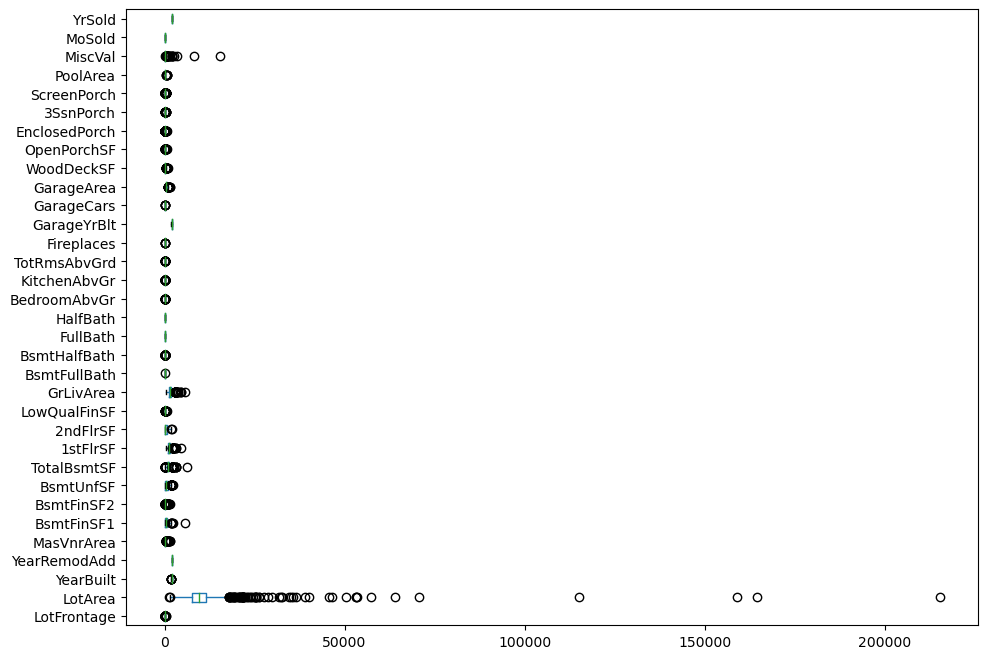

In [21]:
# Boxplots for each numerical column
boxplots = num_cols.boxplot(grid=False, vert=False, figsize=(11,8))

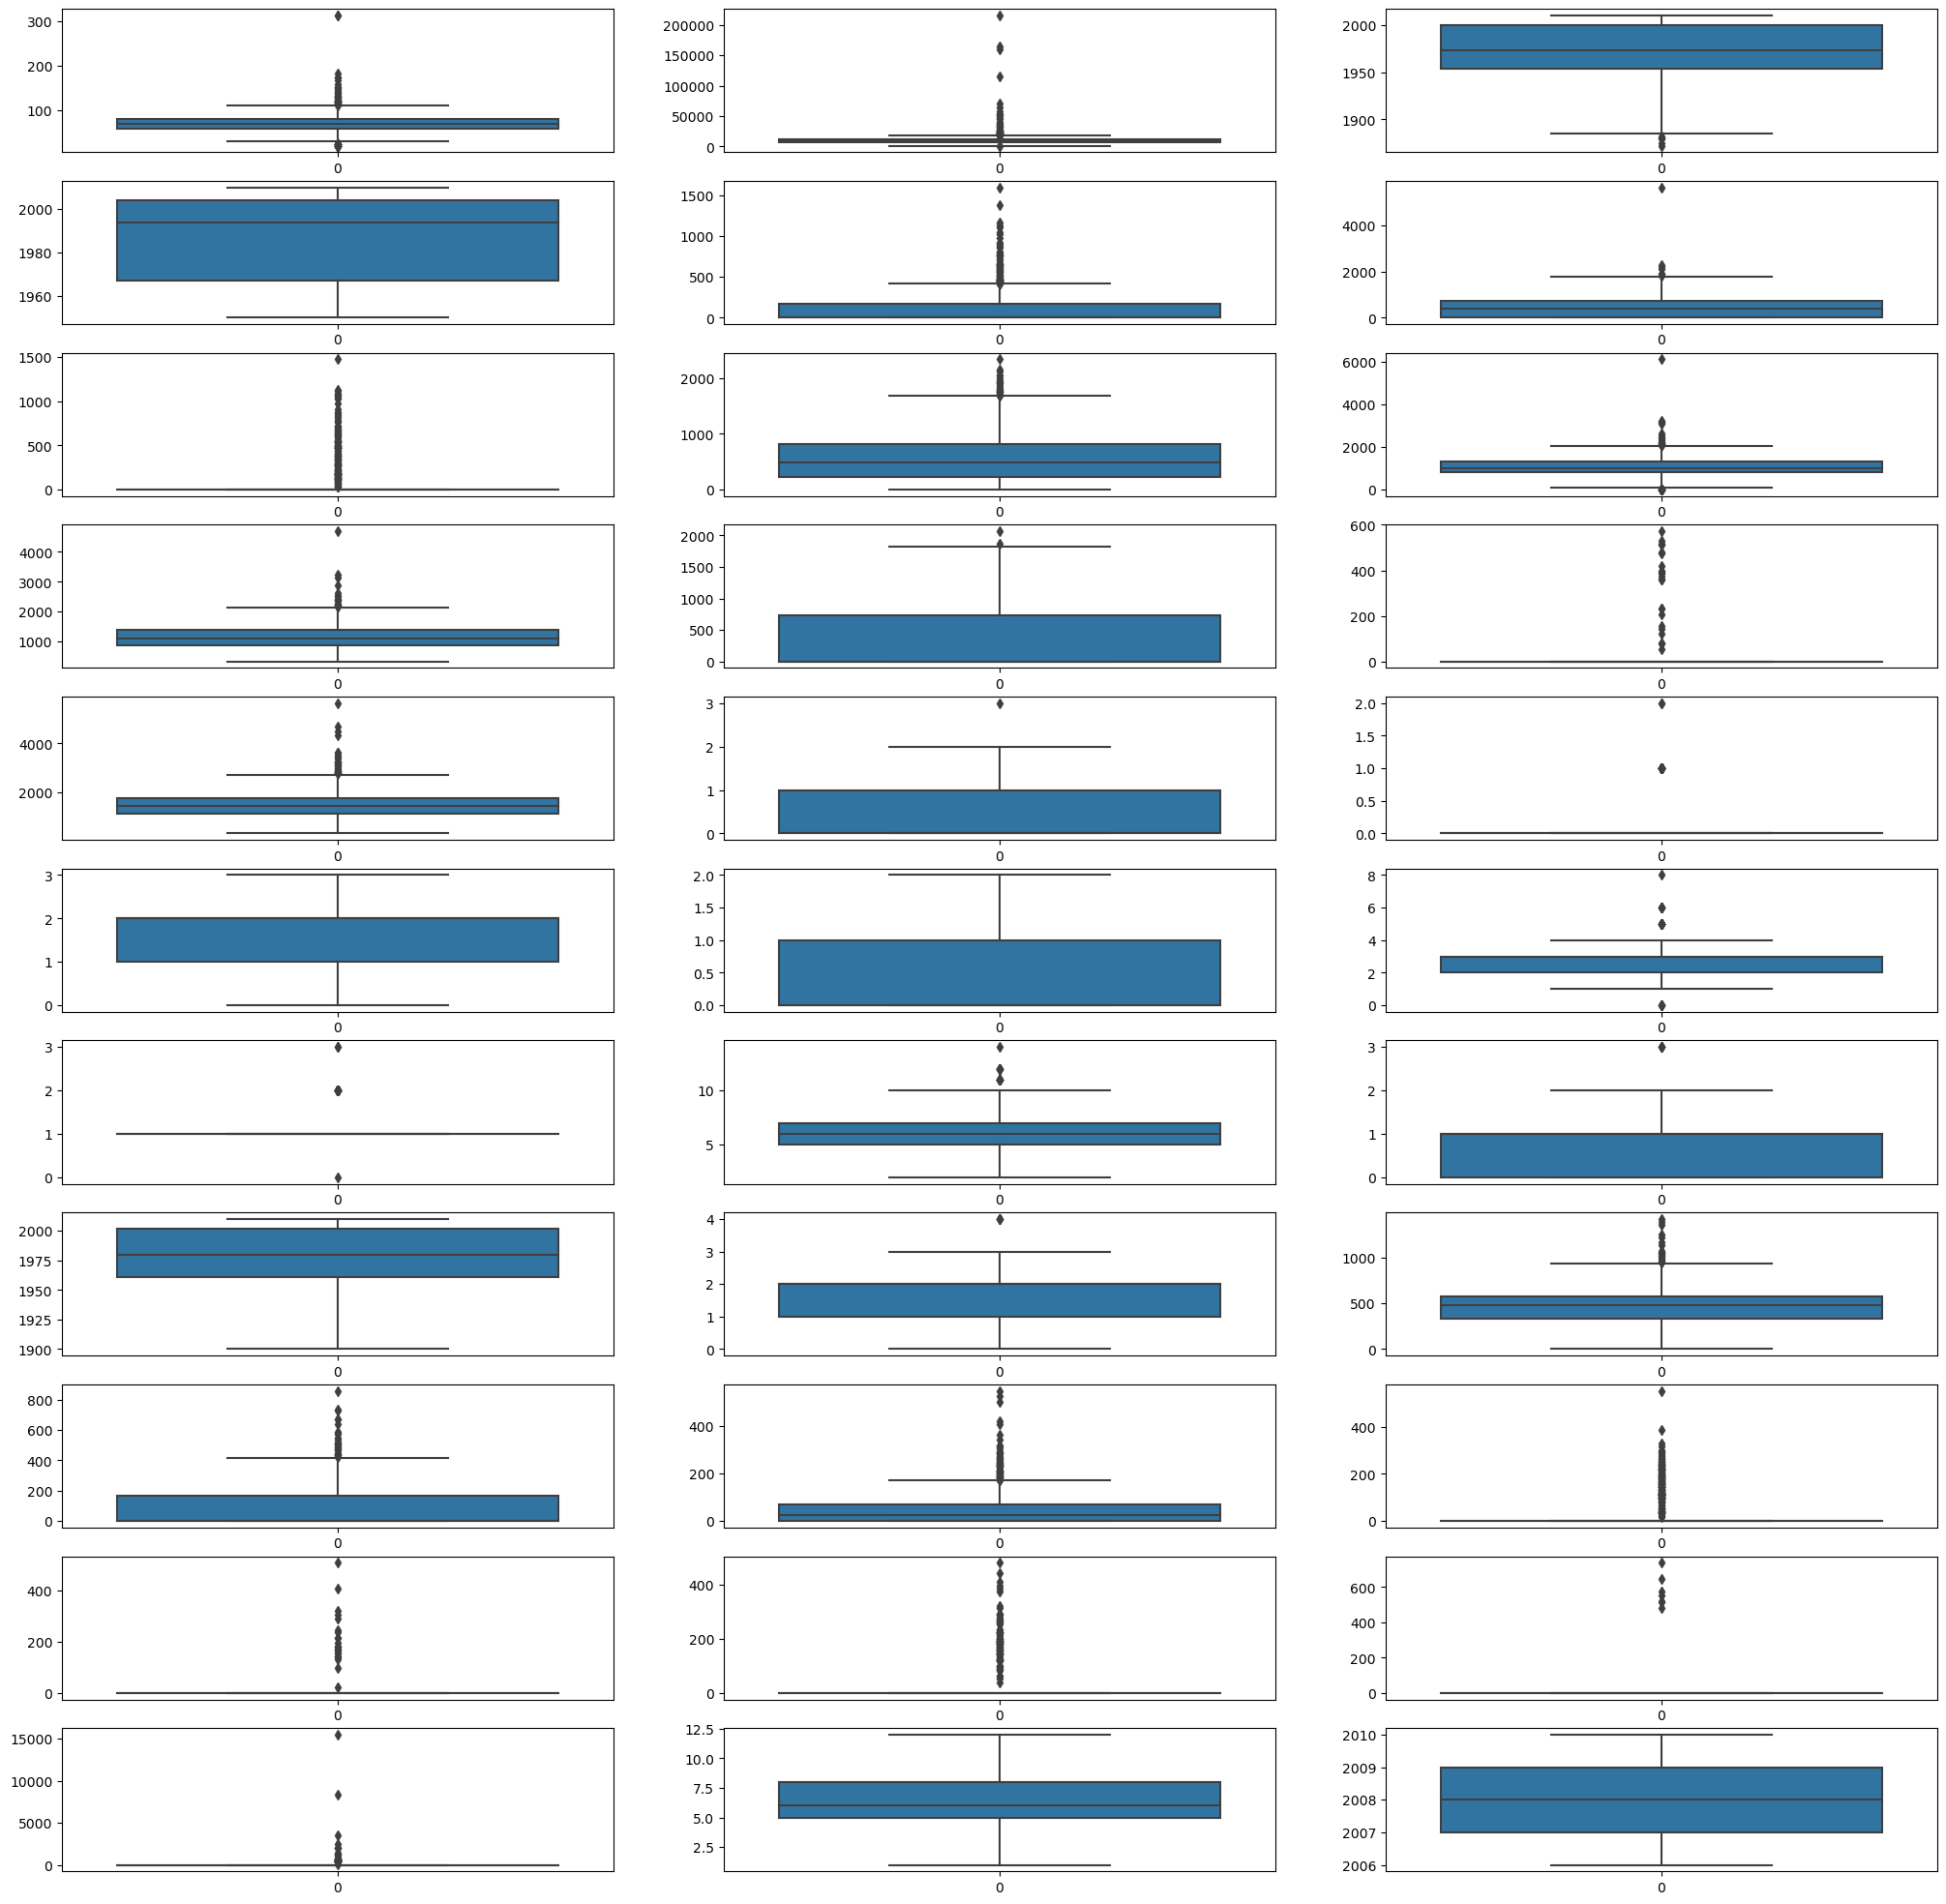

In [22]:
fig,ax = plt.subplots(11,3,figsize=(25,25))

for var,subplot in zip(num_cols.columns,ax.flatten()):
    sns.boxplot(num_cols[var],ax=subplot)
    
plt.show()

In [23]:
## use KNN for missing values in numarical columns
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_num=pd.DataFrame(imputer.fit_transform(num_cols),columns=num_cols.columns)

In [24]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

In [25]:
((cat_col.isnull().sum()/len(cat_col))*100)[(cat_col.isnull().sum()/len(cat_col))*100 >0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64

 PoolQC ,MiscFeature ,Alley, Fence , these columns has more that 80% of null value  and MasVnrType, FireplaceQu has more than 40 % null value . now , we will do insted of droping these columns we will prefer to do some feature engineering 

In [26]:
cat_col['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [27]:
cat_col['PoolQC_avail']=cat_col['PoolQC'].replace(np.nan,0).replace('Gd',1).replace('Ex',1).replace('Fa',1)

In [28]:
cat_col['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [29]:
cat_col['MiscFeature_avail']=cat_col['MiscFeature'].replace(np.nan,0).replace('Shed',1).replace('Gar2',1).replace('Othr',1).replace('TenC',1)

In [30]:
cat_col['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [31]:
cat_col['Alley_avail']=cat_col['Alley'].replace(np.nan,0).replace('Grvl',1).replace('Pave',1)

In [32]:
cat_col['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [33]:
cat_col['Fence_avail']=cat_col['Fence'].replace(np.nan,0).replace('MnPrv',1).replace('GdPrv',1).replace('GdWo',1).replace('MnWw',1)

In [34]:
cat_col['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [35]:
cat_col['MasVnrType_avail']=cat_col['MasVnrType'].replace(np.nan,0).replace('BrkFace',1).replace('Stone',1).replace('BrkCmn',1)

In [36]:
cat_col['MasVnrType_avail'].value_counts()

MasVnrType_avail
0    872
1    588
Name: count, dtype: int64

In [37]:
cat_col['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [38]:
cat_col['FireplaceQu_avail']=cat_col['FireplaceQu'].replace(np.nan,0).replace('Gd',1).replace('TA',1).replace('Fa',1).replace('Ex',1).replace('Po',1)

In [39]:
cat_col.drop(['PoolQC','MiscFeature','MasVnrType','FireplaceQu','Alley','Fence'], axis=1,inplace=True)

In [40]:
cat_col[['PoolQC_avail','MiscFeature_avail','Alley_avail','Fence_avail','MasVnrType_avail','FireplaceQu_avail']] = cat_col[['PoolQC_avail','MiscFeature_avail','Alley_avail','Fence_avail','MasVnrType_avail','FireplaceQu_avail']].astype(object)

In [41]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MSSubClass         1460 non-null   object
 1   MSZoning           1460 non-null   object
 2   Street             1460 non-null   object
 3   LotShape           1460 non-null   object
 4   LandContour        1460 non-null   object
 5   Utilities          1460 non-null   object
 6   LotConfig          1460 non-null   object
 7   LandSlope          1460 non-null   object
 8   Neighborhood       1460 non-null   object
 9   Condition1         1460 non-null   object
 10  Condition2         1460 non-null   object
 11  BldgType           1460 non-null   object
 12  HouseStyle         1460 non-null   object
 13  OverallQual        1460 non-null   object
 14  OverallCond        1460 non-null   object
 15  RoofStyle          1460 non-null   object
 16  RoofMatl           1460 non-null   object


In [42]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

imputer.fit(cat_col.iloc[:,:])

SimpleImputer(strategy='most_frequent')

In [43]:
df_cat=pd.DataFrame(imputer.transform(cat_col),columns=cat_col.columns)

In [44]:
## Also we can do 
##df_cat=cat_col.fillna(cat_col.mode().iloc[0], inplace=True)

In [45]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MSSubClass         1460 non-null   object
 1   MSZoning           1460 non-null   object
 2   Street             1460 non-null   object
 3   LotShape           1460 non-null   object
 4   LandContour        1460 non-null   object
 5   Utilities          1460 non-null   object
 6   LotConfig          1460 non-null   object
 7   LandSlope          1460 non-null   object
 8   Neighborhood       1460 non-null   object
 9   Condition1         1460 non-null   object
 10  Condition2         1460 non-null   object
 11  BldgType           1460 non-null   object
 12  HouseStyle         1460 non-null   object
 13  OverallQual        1460 non-null   object
 14  OverallCond        1460 non-null   object
 15  RoofStyle          1460 non-null   object
 16  RoofMatl           1460 non-null   object


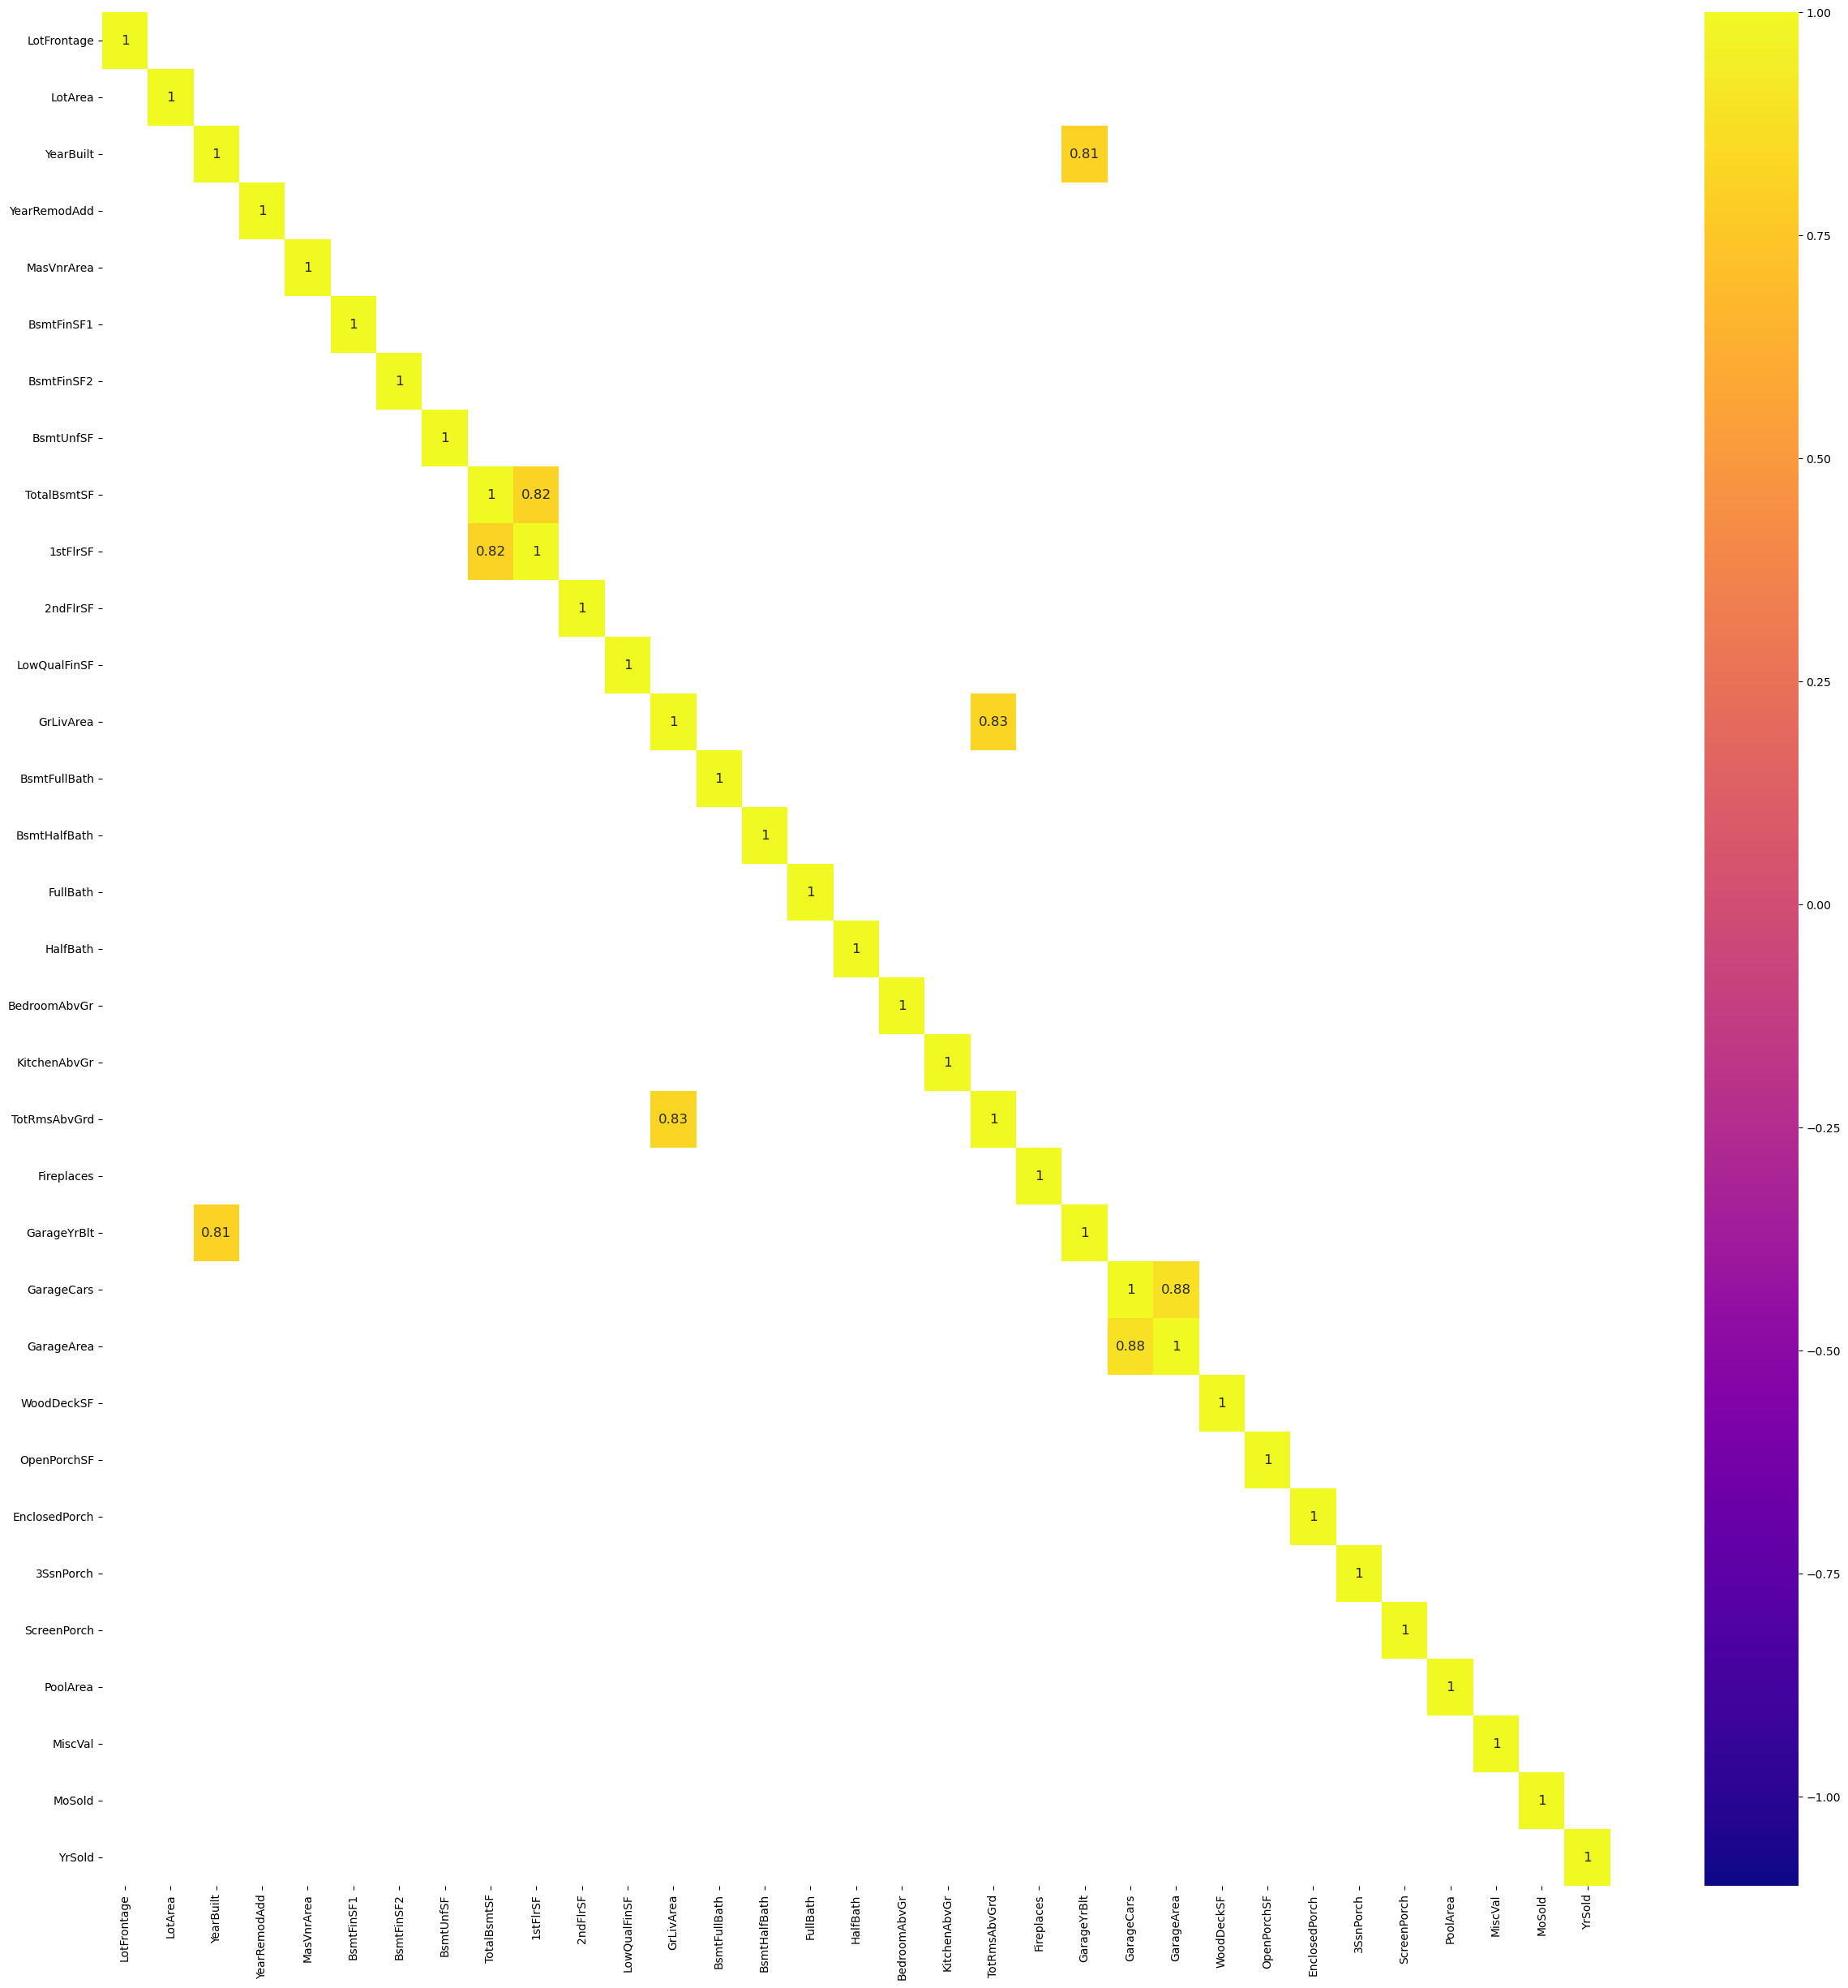

In [46]:
plt.figure(figsize=(30,30))

sns.heatmap(df_num.corr()[(df_num.corr()>=0.75)|(df_num.corr()<=-0.75)],
           cmap='plasma',
           annot=True,
           vmin=1.0,
           vmax=-1.0,
           annot_kws={"size":12})
plt.show()

# Auto EDA

In [47]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [48]:
import sweetviz as sv 

report1_num=sv.analyze(df_num)
report1_num.show_html('report1_num.html')

                                             |                                             | [  0%]   00:00 ->…

Report report1_num.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [49]:
report2_cat=sv.analyze(df_cat)
report2_cat.show_html('report2_cat.html')

                                             |                                             | [  0%]   00:00 ->…

Report report2_cat.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [50]:
#pip install AutoViz

#This laibary gives you the data cleaning sugestions

In [51]:
#from autoviz.AutoViz_Class import AutoViz_Class
#AV = AutoViz_Class()

In [52]:
##df_num.to_csv("HousePr_num_AV.csv")


In [53]:
##AV.AutoViz("HousePr_num_AV.csv")

# Encoding for categarical variable 

In [54]:
## Transform the target variable 
df_target= np.log(df_price['SalePrice'])

In [55]:
df_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [56]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [57]:
def cat_boost(cat_input,target):
    catboost=ce.cat_boost.CatBoostEncoder()
    catboost.fit(cat_input,target)
    df_encoded=round(catboost.transform(cat_input),2)
    return df_encoded

In [58]:
import category_encoders as ce
df_cat_en= cat_boost(df_cat,df_target)

In [59]:
df_cat_en.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_avail,MiscFeature_avail,Alley_avail,Fence_avail,MasVnrType_avail,FireplaceQu_avail
0,12.34,12.09,12.03,11.94,12.02,12.02,12.00,12.02,12.16,12.04,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,11.81
1,12.05,12.09,12.03,11.94,12.02,12.02,12.03,12.02,12.32,11.82,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.90,12.22
2,12.34,12.09,12.03,12.16,12.02,12.02,12.00,12.02,12.16,12.04,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,12.22
3,11.97,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.20,12.04,...,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,11.90,12.22
4,12.34,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.66,12.04,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,12.22


In [60]:
X=pd.concat([df_num,df_cat_en],axis=1)

In [61]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_avail,MiscFeature_avail,Alley_avail,Fence_avail,MasVnrType_avail,FireplaceQu_avail
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,11.81
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.90,12.22
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,12.22
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,11.90,12.22
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,12.22


In [62]:
X.shape

(1460, 79)

# Model Building 

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               df_target,
                                              test_size=0.3,
                                              random_state=0)

###  Building Linear Regression model 

In [65]:
lr=LinearRegression()
model_LR=lr.fit(X_train,y_train)
pred_train=model_LR.predict(X_train)
pred_test=model_LR.predict(X_test)

In [66]:
r2_train=r2_score(y_train,pred_train)
r2_test=r2_score(y_test,pred_test)

In [67]:
print("R2 Train Score ",r2_train)
print("R2 Test Score ",r2_test)

R2 Train Score  0.9145563098428308
R2 Test Score  0.8430978175117734


In [68]:
# calculate the RMSE Score
print("RMSE train", np.sqrt(mean_squared_error(y_train,pred_train)))
print("RMSE test",  np.sqrt(mean_squared_error(y_test,pred_test)))

RMSE train 0.11749191848153456
RMSE test 0.1557020689724589


### Using OLS method Model Building 

In [69]:
import statsmodels.api as sm

temp_x=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(temp_x,
                                               df_target,
                                              test_size=0.3,
                                              random_state=0)

In [70]:
model_ols=sm.OLS(y_train,X_train).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     133.1
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:06:07   Log-Likelihood:                 738.34
No. Observations:                1022   AIC:                            -1323.
Df Residuals:                     945   BIC:                            -943.1
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
LotFrontage           0.0004      0.000      1.787      0.074   -4.15e-05       0.001
LotArea            1.384e-06   4.93e-07      2.808      0.005    4.17e-07    2.35e-06
YearBuilt            -0.0009      0.000     -2.264      0.024      -0.002      -0.000
YearRemodAdd          0.0016      0.000      5.274      0.000       0.001       0.002
MasVnrArea        -1.745e-05   3.28e-05     -0.533      0.594   -8.18e-05    4.69e-05
BsmtFinSF1         4.925e-05    1.2e-05      4.107      0.000    2.57e-05    7.28e-05
BsmtFinSF2         3.783e-05   2.12e-05      1.784      0.075   -3.78e-06    7.94e-05
BsmtUnfSF         -9.939e-06   1.12e-05     -0.888      0.375   -3.19e-05     1.2e-05
TotalBsmtSF        7.714e-05   1.53e-05      5.027      0.000     4.7e-05       0.000
1stFlrSF           5.271e-05   2.77e-05      1.900      0.058   -1.73e-06       0.000
2ndFlrSF           3.026e-05   2.61e-05      1.158      0.247    -2.1e-05    8.15e-05
LowQualFinSF       5.341e-05   6.78e-05      0.787      0.431   -7.97e-05       0.000
GrLivArea             0.0001   2.64e-05      5.160      0.000    8.45e-05       0.000
BsmtFullBath          0.0295      0.012      2.519      0.012       0.007       0.052
BsmtHalfBath          0.0153      0.018      0.827      0.408      -0.021       0.051
FullBath              0.0224      0.013      1.760      0.079      -0.003       0.047
HalfBath              0.0370      0.012      3.022      0.003       0.013       0.061
BedroomAbvGr          0.0182      0.008      2.308      0.021       0.003       0.034
KitchenAbvGr         -0.0479      0.026     -1.839      0.066      -0.099       0.003
TotRmsAbvGrd          0.0074      0.005      1.367      0.172      -0.003       0.018
Fireplaces            0.0349      0.016      2.247      0.025       0.004       0.065
GarageYrBlt          -0.0009      0.000     -2.557      0.011      -0.002      -0.000
GarageCars            0.0119      0.013      0.883      0.378      -0.015       0.038
GarageArea            0.0002   4.62e-05      3.361      0.001    6.47e-05       0.000
WoodDeckSF            0.0001   3.45e-05      2.987      0.003    3.53e-05       0.000
OpenPorchSF        1.522e-05   6.45e-05      0.236      0.814      -0.000       0.000
EnclosedPorch      2.267e-05   7.11e-05      0.319      0.750      -0.000       0.000
3SsnPorch             0.0002      0.000      1.349      0.178   -8.41e-05       0.000
ScreenPorch           0.0002   7.44e-05      3.157      0.002    8.89e-05       0.000
PoolArea              0.0024      0.001      2.978      0.003       0.001       0.004
MiscVal            1.522e-06    7.6e-06      0.200      0.841   -1.34e-05    1.64e-05
MoSold               -0.0016      0.001     -1.096      0.274      -0.005       0.001
YrSold               -0.0039      0.003     -1.255      0.210      -0.010

In [71]:
# Build the Cluster to get classes or Labels 

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df_num_std=pd.DataFrame(sc.fit_transform(df_num), columns=df_num.columns)
df_num_std.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.250384,-0.207142,1.050994,0.878668,0.506062,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.381302,-0.091886,0.156734,-0.429577,-0.575300,1.171992,-0.288653,-0.641228,0.466465,0.257140,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-0.124047,0.073480,0.984752,0.830215,0.318479,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-0.460946,-0.096897,-1.863632,-0.720298,-0.575300,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.549751,0.375148,0.951632,0.733308,1.355703,0.463568,-0.288653,-0.174865,0.199680,-0.045611,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


## KMeans Clustering

In [72]:
from sklearn.cluster import KMeans
cluster_range= range(1,11)
cluster_error=[]

for num_cluster in cluster_range:
    clusters= KMeans(num_cluster,n_init=15,random_state=2)
    clusters.fit(df_num_std)
    labels=clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_error.append(clusters.inertia_)
    
cluster_df=pd.DataFrame({"num_clusters" : cluster_range,"cluster_error": cluster_error})

    


In [73]:
cluster_df

,num_clusters,cluster_error
0,1,48180.000000
1,2,41888.451350
2,3,39364.468962
3,4,37780.633277
4,5,36163.639003
5,6,34946.704001
6,7,33883.462211
7,8,32522.776187
8,9,31572.153292
9,10,30262.102939


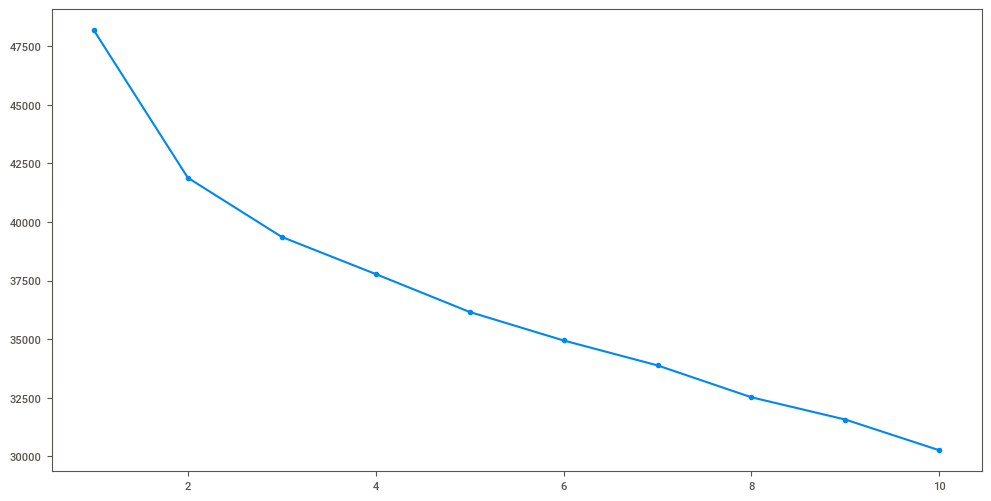

In [74]:
## ELBO PLOT FOR K-CLUSTER

plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_error,marker='o')
plt.show()

## Silhouttte score

In [75]:

from sklearn.metrics import silhouette_score, silhouette_samples

In [76]:
n_clusters = [2,3,4,5]


for k in n_clusters:
    cluster = KMeans(n_clusters=k,random_state=10)
    labels = cluster.fit_predict(df_num_std)
    score = silhouette_score(df_num_std,labels, random_state=10)
    print("For {} clusters the silhouette score is {}".format(k,score))

For 2 clusters the silhouette score is 0.1399424568045511
For 3 clusters the silhouette score is 0.12544748173574632
For 4 clusters the silhouette score is 0.11716511025395487
For 5 clusters the silhouette score is 0.1233659742603346


In [77]:
# Visualization of Silhoutte score 
!pip install yellowbrick

In [78]:
from yellowbrick.cluster import SilhouetteVisualizer

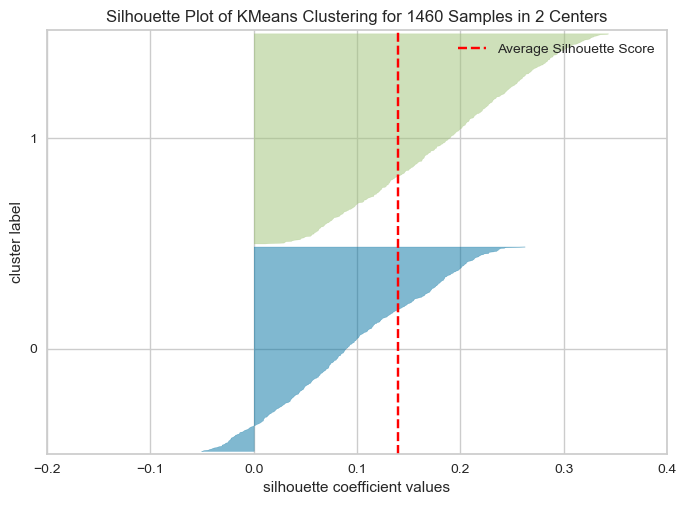

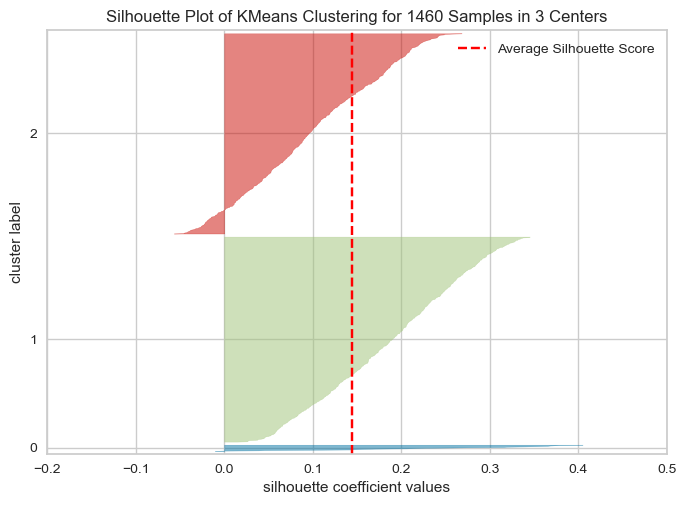

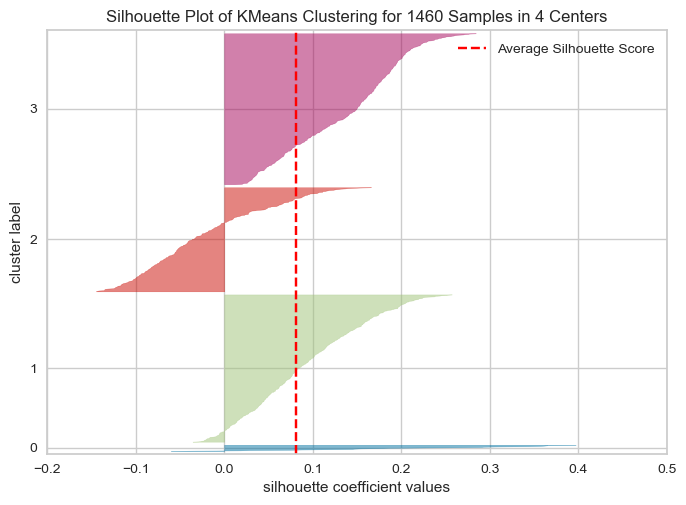

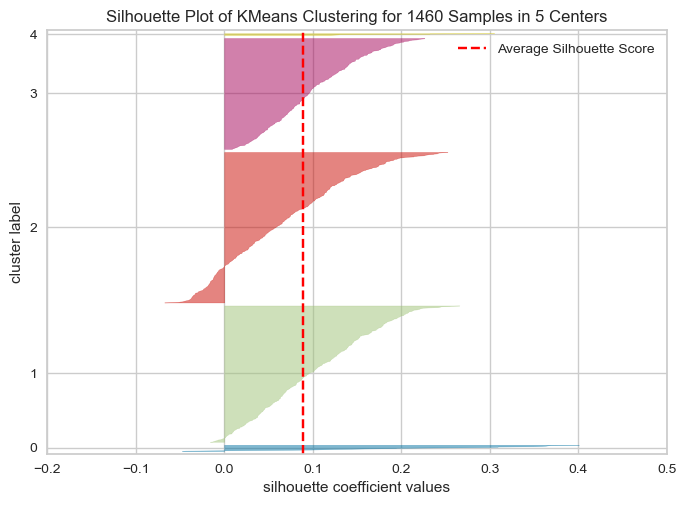

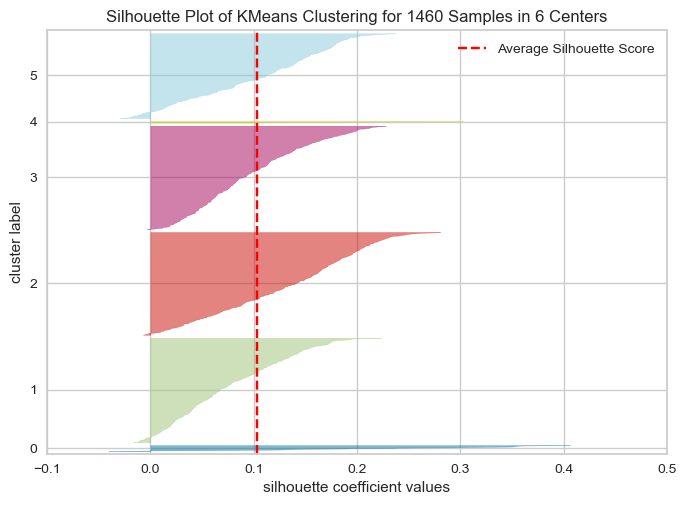

In [79]:
# Visualization of Silhoutte score 
for i in range(2,7):
    kms = KMeans(n_clusters=i)
    kms.fit(df_num_std)
    model = KMeans(n_clusters=i,random_state = 42)
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(df_num_std)
    visualizer.show()

### Looking at the visualization of the clusters- we cannot go ahead with one definate cluster as all the cluster formation has one or other outliers. So there is no point in forming clusters.

### Principal Component Analysis

In [80]:
 from sklearn.decomposition import PCA

In [81]:
pca_hp = PCA().fit(df_num_std)

In [82]:
pca_hp.explained_variance_

array([6.55140008e+00, 3.14986432e+00, 2.48600899e+00, 1.88432690e+00,
       1.30983403e+00, 1.15589517e+00, 1.12442318e+00, 1.11708805e+00,
       1.08067584e+00, 1.03637664e+00, 1.01637558e+00, 9.96032548e-01,
       9.51338274e-01, 9.05082971e-01, 8.93799250e-01, 8.52767424e-01,
       8.20315876e-01, 7.36918410e-01, 7.04323197e-01, 6.45078964e-01,
       6.18234253e-01, 5.83710687e-01, 4.87396614e-01, 4.23489391e-01,
       3.87056604e-01, 2.99233052e-01, 2.28382612e-01, 2.00239444e-01,
       1.51784285e-01, 1.30544068e-01, 9.46215296e-02, 1.29203585e-30,
       4.50596505e-32])

In [83]:
pca_hp.components_

array([[ 1.85909004e-01,  1.23787912e-01,  2.36999863e-01, ...,
        -8.79816874e-03,  2.13195754e-02, -1.35226796e-02],
       [ 3.88202169e-02, -1.05753683e-02, -2.28344719e-01, ...,
         2.82218496e-02,  3.01367848e-02, -3.80426302e-02],
       [ 2.81770580e-01,  2.89235231e-01, -3.13595880e-01, ...,
         4.10372593e-02, -1.67502844e-02,  5.97972135e-03],
       ...,
       [ 5.09080280e-02, -1.08506323e-02, -1.97477942e-01, ...,
         1.35496813e-02, -4.75549683e-03,  6.03440316e-03],
       [-1.24368804e-16,  2.91327895e-16,  1.19905739e-16, ...,
        -1.79507283e-16,  7.09884048e-17, -1.05785603e-16],
       [-0.00000000e+00,  1.75940234e-17,  6.66211898e-17, ...,
         8.67945367e-18,  1.34011595e-16,  1.85196911e-16]])

In [84]:
pca_hp.n_components_

33

In [85]:
var = np.cumsum(np.round(pca_hp.explained_variance_ratio_,decimals =6)*100)
var

array([19.8391, 29.3776, 36.9058, 42.612 , 46.5785, 50.0788, 53.4838,
       56.8666, 60.1391, 63.2775, 66.3553, 69.3715, 72.2524, 74.9932,
       77.6998, 80.2822, 82.7663, 84.9979, 87.1308, 89.0842, 90.9564,
       92.724 , 94.1999, 95.4823, 96.6544, 97.5605, 98.2521, 98.8585,
       99.3181, 99.7134, 99.9999, 99.9999, 99.9999])

In [86]:
pca_hp_new = PCA(n_components=28)
data_reduced = pca_hp_new.fit_transform(df_num_std)
data_reduced.transpose()

array([[ 1.27685687,  0.18842651,  1.46190286, ...,  0.61127826,
        -2.65874934, -0.58903244],
       [ 0.13021464, -1.01346076,  0.05512765, ...,  3.21762125,
        -1.77830092, -1.37660689],
       [-1.47302897,  0.82601199, -1.32305359, ...,  0.92828884,
         2.13412191,  1.64120205],
       ...,
       [ 0.3843014 ,  0.18601832,  0.75495924, ...,  0.20227453,
         0.08458639, -0.32651154],
       [-0.19308871,  0.49322858,  0.20540984, ..., -0.08195263,
         0.27252714,  0.50608511],
       [-0.33817353,  0.18181136,  0.16200454, ...,  0.7387745 ,
         0.20714675, -0.28689031]])

In [87]:
pca_df_hp = pd.DataFrame(data_reduced)
pca_df_hp.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.276857,0.130215,-1.473029,-2.325803,1.356024,-0.679696,-0.270320,0.052471,-0.359190,0.482035,...,-0.623460,-0.186147,0.356026,0.066558,0.304982,0.136912,0.032223,0.384301,-0.193089,-0.338174
1,0.188427,-1.013461,0.826012,0.162873,-1.112971,1.372789,2.885912,-0.377571,0.033826,-0.109441,...,0.937513,-0.582141,-0.735750,-0.455431,-0.447518,-0.679293,0.576268,0.186018,0.493229,0.181811
2,1.461903,0.055128,-1.323054,-1.724977,0.084999,0.499097,-0.449412,0.008598,-0.114331,0.022023,...,-0.988369,0.755899,-0.294088,0.183627,0.298012,-0.204028,-0.337771,0.754959,0.205410,0.162005
3,-0.599675,1.090383,0.956752,-0.084582,0.462138,-0.646748,-0.868984,0.983957,-2.808360,-1.207718,...,1.234526,-0.537227,0.206092,0.029243,0.454427,-0.483619,-1.342041,0.302674,-1.345332,0.210860
4,4.160758,0.958771,-0.580692,-1.699225,0.126549,1.324418,-0.106857,-0.115887,-0.103795,-0.683791,...,-0.607402,-0.373063,0.078934,-0.183305,0.384260,-0.013041,-0.830111,0.259695,-0.030192,0.034429


In [88]:
pca_corr = pca_df_hp.corr()
pca_corr

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.000000e+00,-4.556285e-17,-2.255864e-16,-2.636160e-16,-5.409595e-17,-4.424341e-18,-1.546490e-16,1.473925e-17,9.091398e-17,-9.937818e-17,...,5.639556e-17,3.360991e-17,8.002573e-17,4.148072e-17,5.722227e-16,-1.033835e-16,-2.623451e-17,-4.842402e-17,3.508613e-17,2.559503e-17
1,-4.556285e-17,1.000000e+00,2.208074e-16,2.175152e-16,-2.427593e-17,-8.974883e-17,1.177431e-16,-6.328342e-18,-1.124313e-16,1.844694e-17,...,2.452247e-17,1.430663e-16,4.487788e-17,-5.320084e-17,7.124030e-17,8.037992e-18,-4.327942e-17,3.793583e-17,-5.813698e-17,4.235030e-17
2,-2.255864e-16,2.208074e-16,1.000000e+00,-9.084854e-17,-9.399517e-17,9.561455e-18,2.221051e-17,8.319711e-17,1.931298e-17,5.271686e-17,...,1.978227e-17,1.091222e-16,4.364120e-17,1.831904e-17,-9.235678e-17,1.145064e-16,8.796895e-17,-1.754824e-16,-1.132081e-16,4.475864e-17
3,-2.636160e-16,2.175152e-16,-9.084854e-17,1.000000e+00,1.704949e-17,-3.681424e-17,-1.076909e-16,-1.325898e-16,3.306137e-17,-1.474574e-16,...,-1.170455e-16,3.644218e-17,-6.486167e-18,4.759725e-17,-2.656816e-16,1.042646e-16,-1.005075e-16,1.732879e-16,6.785802e-17,-4.979985e-17
4,-5.409595e-17,-2.427593e-17,-9.399517e-17,1.704949e-17,1.000000e+00,1.170371e-16,-3.230411e-16,-6.230998e-17,4.860855e-17,-3.820708e-17,...,-2.889326e-16,-1.085283e-16,-1.283636e-16,1.371526e-16,1.894739e-16,-6.089362e-17,1.604934e-16,2.483952e-16,2.424310e-17,1.170470e-16
5,-4.424341e-18,-8.974883e-17,9.561455e-18,-3.681424e-17,1.170371e-16,1.000000e+00,-5.438534e-16,2.176383e-17,-1.971045e-16,-1.271600e-16,...,2.831981e-16,-2.163420e-16,1.604533e-17,1.361803e-17,-1.427438e-16,-2.760362e-16,-1.740888e-16,2.050138e-16,1.284054e-16,2.102657e-16
6,-1.546490e-16,1.177431e-16,2.221051e-17,-1.076909e-16,-3.230411e-16,-5.438534e-16,1.000000e+00,8.690731e-18,-1.460690e-16,-3.761379e-16,...,1.180003e-16,7.433733e-17,-2.738008e-17,2.179110e-17,4.031405e-16,-1.164482e-16,-3.691074e-18,5.063754e-17,1.202793e-16,-1.502640e-16
7,1.473925e-17,-6.328342e-18,8.319711e-17,-1.325898e-16,-6.230998e-17,2.176383e-17,8.690731e-18,1.000000e+00,2.227304e-16,-1.247530e-16,...,2.889331e-16,-9.322623e-17,-8.717092e-17,-3.680821e-16,-1.161204e-16,8.076307e-18,3.321283e-17,7.475750e-17,-2.244740e-17,-4.858960e-17
8,9.091398e-17,-1.124313e-16,1.931298e-17,3.306137e-17,4.860855e-17,-1.971045e-16,-1.460690e-16,2.227304e-16,1.000000e+00,5.852923e-17,...,-1.262961e-16,4.848556e-17,2.290160e-16,1.864452e-16,-2.747054e-17,9.437303e-17,4.282737e-17,-1.889458e-16,2.315941e-16,-1.567922e-16
9,-9.937818e-17,1.844694e-17,5.271686e-17,-1.474574e-16,-3.820708e-17,-1.271600e-16,-3.761379e-16,-1.247530e-16,5.852923e-17,1.000000e+00,...,-2.892852e-16,1.481606e-16,6.426378e-17,2.903763e-16,-9.807320e-17,1.217533e-16,-1.465780e-16,1.213401e-16,1.535947e-16,5.838059e-17


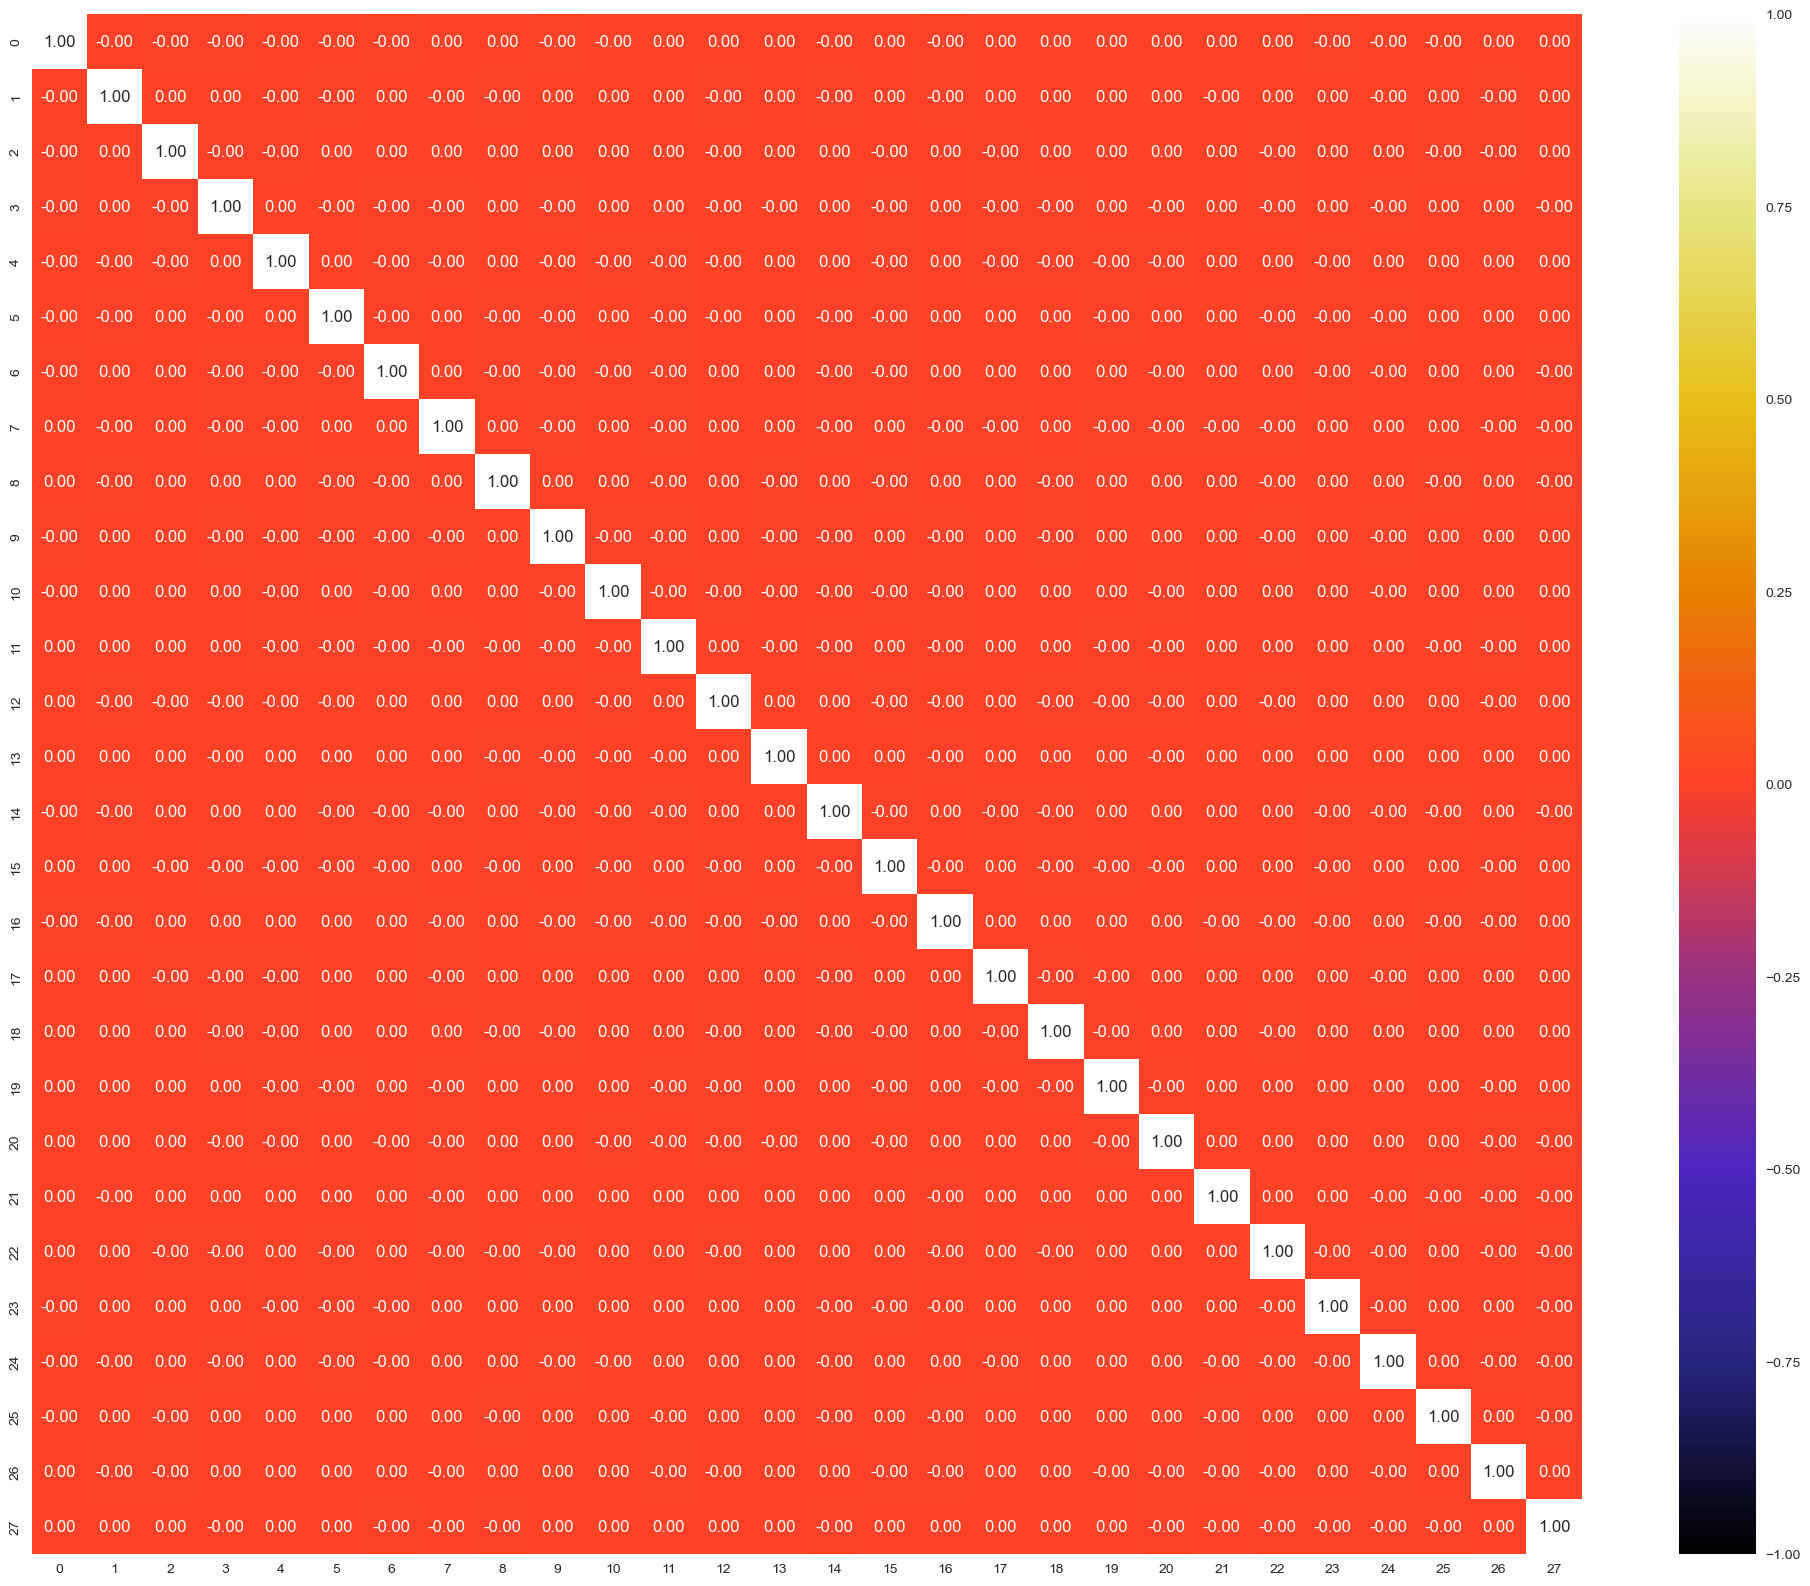

In [89]:
plt.figure(figsize=(25,20))
sns.heatmap(pca_corr,annot=True,fmt='.2f',cmap='CMRmap',vmin=-1,vmax=1)
plt.show()

#### we can drop last 5 columns

In [90]:
df_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
df_target.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [92]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_avail,MiscFeature_avail,Alley_avail,Fence_avail,MasVnrType_avail,FireplaceQu_avail
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,11.81
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.90,12.22
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,12.22
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,11.90,12.22
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.21,12.22


# Decision Tree Model 

In [93]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [94]:
X_train,X_test,y_train,y_test= train_test_split(X,df_target,
                                               test_size=0.3,
                                               random_state=0)

In [95]:
dtr=tree.DecisionTreeRegressor(random_state=123)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=123)

In [96]:
print("model R2 score in train data :",dtr.score(X_train,y_train))

model R2 score in train data : 1.0


In [97]:
print("model R2 score in test data :",dtr.score(X_test,y_test))

model R2 score in test data : 0.7340758628189552


In [98]:
# RMSE for the decision tree model
RMSE_TRAIN=np.sqrt(mean_squared_error(y_train,dtr.predict(X_train)))
print("model RMSE score in train data :",RMSE_TRAIN)

model RMSE score in train data : 0.0


In [99]:
RMSE_TEST=np.sqrt(mean_squared_error(y_test,dtr.predict(X_test)))
print("model RMSE score in train data :",RMSE_TEST)

model RMSE score in train data : 0.20270234391677044


## Random Forest Model (Ensamble Technic)

In [100]:
rfr=RandomForestRegressor(random_state=123)
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=123)

In [101]:
print("RFR model R2 score in train data :",rfr.score(X_train,y_train))

RFR model R2 score in train data : 0.9825106419468137


In [102]:
print("RFR model R2 score in test data :",rfr.score(X_test,y_test))

RFR model R2 score in test data : 0.894626452519197


In [103]:
# RMSE for the Radom Forest model
RMSE_TRAIN=np.sqrt(mean_squared_error(y_train,rfr.predict(X_train)))
print("model RMSE score in train data :",RMSE_TRAIN)

model RMSE score in train data : 0.053156322980169486


In [104]:
# RMSE for the Radom Forest model
RMSE_TEST=np.sqrt(mean_squared_error(y_test,rfr.predict(X_test)))
print("model RMSE score in test data :",RMSE_TEST)

model RMSE score in test data : 0.12759853607386953


## Hyperparameter Tunning 

In [105]:
param_grid = {'max_depth'       : [7,10],
              'max_features'    : [4,6],
              'min_samples_leaf' : [3,15,30],
              'min_samples_split': [30,50],
              'n_estimators'    : [150,200]
             }

In [106]:
 grid_search=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=3)

In [107]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50],
                         'n_estimators': [150, 200]})

In [108]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 30,
 'n_estimators': 200}

In [109]:
rfr = RandomForestRegressor(n_estimators=150,
                      max_depth = 10,
                      max_features =6,
                      min_samples_leaf=3,
                      min_samples_split=30,
                      random_state=123)

In [110]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=3,
                      min_samples_split=30, n_estimators=150, random_state=123)

In [111]:
print("RFR model R2 score in train data :",rfr.score(X_train,y_train))

RFR model R2 score in train data : 0.8856499701519293


In [112]:
print("RFR model R2 score in test data :",rfr.score(X_test,y_test))

RFR model R2 score in test data : 0.8694703518150327


In [113]:
# RMSE for the Radom Forest model
RMSE_TRAIN=np.sqrt(mean_squared_error(y_train,rfr.predict(X_train)))
print("model RMSE score in train data :",RMSE_TRAIN)

model RMSE score in train data : 0.1359208676562963


In [114]:
# RMSE for the Radom Forest model
RMSE_TEST=np.sqrt(mean_squared_error(y_test,rfr.predict(X_test)))
print("model RMSE score in test data :",RMSE_TEST)

model RMSE score in test data : 0.1420150839780578


#### Now try to build model using Pipline laibery 

Use of Pipelines They are automated ML which works on the concept of pipilines. Pipeline - you need to give a sequence. The automation will depend on the way you have given the sequence You can scale the data and build the model. Pipeline does not understand the procedure. Hence it is the job of datascientist that the sequence given should be right.

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [116]:
X_train,X_test,y_train,y_test= train_test_split(X,df_target,
                                               test_size=0.3,
                                               random_state=0)

In [119]:
pipe = Pipeline((
                ("sfm",SelectFromModel(estimator=RandomForestRegressor(),max_features=70)),
                ("lr",LinearRegression())
))

pipe.fit(X_train,y_train)

print("Training R2")
print(pipe.score(X_train,y_train))

print("Testing R2")
print(pipe.score(X_test,y_test))


Training R2
0.8638721980251526
Testing R2
0.7989667805781382


In [120]:
## here 1st it's taking best 70 feature from Random forest model and then giving it to the LR model 

In [121]:
pipe = Pipeline((
                ("sfm",RFE(estimator=LinearRegression(),n_features_to_select=50)),
                ("lr",LinearRegression())
))

pipe.fit(X_train,y_train)

print("Training R2")
print(pipe.score(X_train,y_train))

print("Testing R2")
print(pipe.score(X_test,y_test))

Training R2
0.8823163578199024
Testing R2
0.8443268265935852


In [123]:
# scaling with Pipelines
from sklearn.model_selection import cross_val_score

In [126]:
pipe = Pipeline((
                ("sc",StandardScaler()),
                ("lr",LinearRegression())
))

pipe.fit(X_train,y_train)

print("Training R2")
print(pipe.score(X_train,y_train))

print("Testing R2")
print(pipe.score(X_test,y_test))


print("Cross Validation Score")
crossvalscore = cross_val_score(pipe,X_train,y_train,cv=3)
print(np.mean(crossvalscore))

Training R2
0.9145578765161466
Testing R2
0.843398503269933
Cross Validation Score
0.8815148201574408


In [129]:
PCA_pipe = Pipeline((
                ("sc",StandardScaler()),
                ("pca",PCA(n_components=28)),
                ("lr",LinearRegression())
))

PCA_pipe.fit(X_train,y_train)

print("Training R2")
print(PCA_pipe.score(X_train,y_train))

print("Testing R2")
print(PCA_pipe.score(X_test,y_test))


print("Cross Validation Score")
crossvalscore = cross_val_score(PCA_pipe,X_train,y_train,cv=5)
print(np.mean(crossvalscore))

Training R2
0.8837095053285217
Testing R2
0.8094967039779779
Cross Validation Score
0.8614433841882576
